### Notebook to test OptoSim photon transport

In [1]:
from OpticalPhoton import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import json

#### Setup the system geometry

In [28]:
filename = 'testit.json'
# done through the config file.....
config_xams = {
    "detector": "XAMS",
    "nevents": 1000,
    "nphoton_per_event": 100000,
    "photon_zgen": 0.1,
    "geometry":{
        "type": "cylinder",
        "radius": 2.5,
        "ztop": 1.0,
        "zliq": 0.0,
        "zbot": -4.0,
        "ptfe_zmin": -99999.,
        "ptfe_zmax": +99999.
    },
    "npmt_xy": 2,
    "pmt":{
        "type": "square",
        "size": 2.54,
        "ndivs": 10
    },
    "set_no_scatter": False,
    "set_experimental_scatter_model": True
}

config_xenon = {
    "detector": "XENON",
    "nevents": 1000,
    "nphoton_per_event": 1000000,
    "photon_zgen": 0.1,
    "geometry":{
        "type": "cylinder",
        "radius": 65.0,
        "ztop": 10.0,
        "zliq": 0.0,
        "zbot": -150.0,
        "ptfe_zmin": -99999.,
        "ptfe_zmax": +99999.
    },
    "npmt_xy": 2,
    "pmt":{
        "type": "square",
        "size": 2.54,
        "ndivs": 10
    },
    "set_no_scatter": False,
    "set_experimental_scatter_model": False
}

config = config_xenon
with open(filename, "w") as json_file:
    json.dump(config, json_file, indent=4)

#### Setup the simulation parameters

In [29]:
x0 = (-64.999, 0, -0.1) # starting position of the photons

#### Simulate photon transport

In [30]:
%%time
#
# all configs in the json file.....
#
myPhoton = OpticalPhoton(config='testit.json')

xb = []
yb = []
xt = []
yt = []


for i in range(config['nphoton_per_event']):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    #myPhoton.set_photon_direction(np.array([1,0,0.0]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

OpticalPhoton::Reading configuration from file: testit.json
'set_no_scatter' set to False
'set_experimental_scatter_model' set to False
processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
processed  100000  photons
processed  110000  photons
processed  120000  photons
processed  130000  photons
processed  140000  photons
processed  150000  photons
processed  160000  photons
processed  170000  photons
processed  180000  photons
processed  190000  photons
processed  200000  photons
processed  210000  photons
processed  220000  photons
processed  230000  photons
processed  240000  photons
processed  250000  photons
processed  260000  photons
processed  270000  photons
processed  280000  photons
processed  290000  photons
processed  300000  photons
processed  310000  photons
processed  320

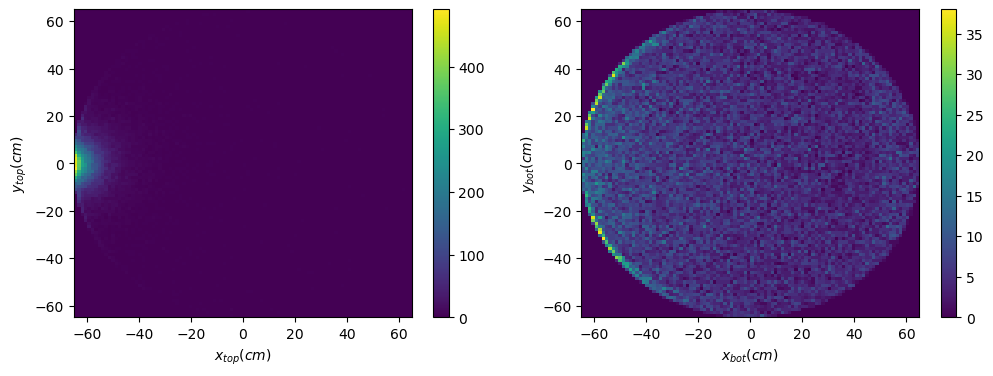

In [31]:
R = config['geometry']['radius']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

h1 = axs[0].hist2d(xt,yt,bins=(100,100),range=((-R,R),(-R,R)))
axs[0].set_xlabel('$x_{top} (cm)$')
axs[0].set_ylabel('$y_{top} (cm)$')
cbar = fig.colorbar(h1[3], ax=axs[0])


h2 = axs[1].hist2d(xb,yb,bins=(100,100),range=((-R,R),(-R,R)))
axs[1].set_xlabel('$x_{bot} (cm)$')
axs[1].set_ylabel('$y_{bot} (cm)$')
cbar = fig.colorbar(h2[3], ax=axs[1])

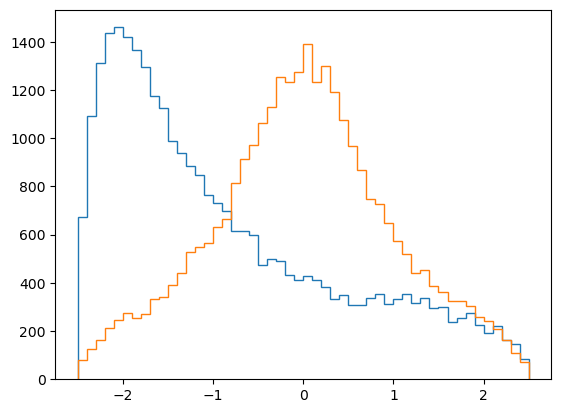

In [6]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

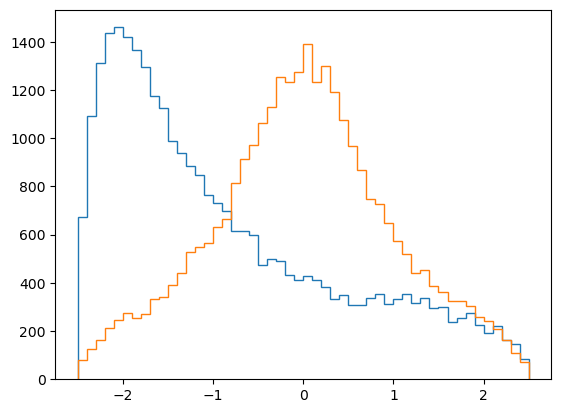

In [7]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

In [8]:
import h5py